## 🔧 1. Implementación de la librería `mutualinfo`

**Estructura modular:**
- `estimators/`
- `uncertainty/`
- `utils/`

**Métodos para estimar Información Mutua (MI):**
- `estimate_mi_histogram`
- `estimate_mi_kde`
- `estimate_mi_kraskov`
- `estimate_mi_kraskov_conformal` (con CP)

In [1]:
!pip install git+https://github.com/JSRP00/mutualinfo.git

  Cloning https://github.com/JSRP00/mutualinfo.git to /tmp/pip-req-build-mtmgxp1o
  Running command git clone --filter=blob:none --quiet https://github.com/JSRP00/mutualinfo.git /tmp/pip-req-build-mtmgxp1o
  Resolved https://github.com/JSRP00/mutualinfo.git to commit f04b4a6f2bc10a880bd65d3c6bcf9e6862d406ac
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for mutualinfo: filename=mutualinfo-0.1.0-py3-none-any.whl size=4191 sha256=c0218d31c6069aea08c66835e381c2e0a7f56d2de330d05eed75ce544dc794e9
  Stored in directory: /tmp/pip-ephem-wheel-cache-su82wng3/wheels/e8/66/d7/32bb80d2ee9cf8a3ddf61cea13e9625adfbdb505b8e5c7572f
Successfully built mutualinfo


In [2]:
!git clone https://github.com/JSRP00/mutualinfo.git
!ls mutualinfo

Cloning into 'mutualinfo'...
remote: Enumerating objects: 447, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 447 (delta 0), reused 0 (delta 0), pack-reused 445 (from 3)
Receiving objects: 100% (447/447), 130.99 KiB | 784.00 KiB/s, done.
Resolving deltas: 100% (224/224), done.
examples    pyproject.toml  requirements.txt  tests
mutualinfo  README.md	    setup.py


In [3]:
! pip show mutualinfo

Name: mutualinfo
Version: 0.1.0
Summary: Librería para estimar la información mutua y cuantificar su incertidumbre
Home-page: https://github.com/JSRP00/mutualinfo
Author: Jorge Santiago Rodríguez Peñalosa
Author-email: Jorge Santiago <jrodriguezp.5@alumni.unav.es>
License: MIT
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, scikit-learn, scipy
Required-by: 


In [4]:
cd mutualinfo/

/content/mutualinfo


In [5]:
pip install -e .

Obtaining file:///content/mutualinfo
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for mutualinfo (pyproject.toml) ... done
  Created wheel for mutualinfo: filename=mutualinfo-0.1.0-0.editable-py3-none-any.whl size=3444 sha256=aafde11e4eee161ea37760c1c587c7f4dc68420fa4c10e79168f696a2f520304
  Stored in directory: /tmp/pip-ephem-wheel-cache-kk6hg6kz/wheels/46/e5/46/d4a691197d551e0f13bee4b8fd42460e2f7047ec25f30a1883
Successfully built mutualinfo
  Attempting uninstall: mutualinfo
    Found existing installation: mutualinfo 0.1.0
    Uninstalling mutualinfo-0.1.0:
      Successfully uninstalled mutualinfo-0.1.0


In [6]:
pip install -r requirements.txt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 173.2/173.2 kB 5.3 MB/s eta 0:00:00


In [7]:
from mutualinfo.estimators import estimate_mi_kraskov
from mutualinfo.uncertainty import bootstrap_ci
from mutualinfo.utils import generate_dependent_data

print("La librería mutualinfo fue importada correctamente ✅")

La librería mutualinfo fue importada correctamente ✅


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mutualinfo.estimators import estimate_mi_kraskov, estimate_mi_kde, estimate_mi_histogram
from mutualinfo.uncertainty import bootstrap_ci, split_conformal_prediction, encode_prediction_sets, predict_confidence_regions, estimate_mi_from_conformal_prediction_sets, estimate_mi_with_uncertainty, regression_coverage_score_manual, estimate_mi_kraskov_conformal, estimate_mi_cp_radius

from mutualinfo.utils import generate_dependent_data, generate_independent_data

## 📊 2. Primer notebook: `01_run_experiments.ipynb`

### a. Generación de datos sintéticos
- 3 tipos de relación:
  - Lineal
  - No lineal
  - Independiente

### b. Evaluación de métodos de estimación
- Comparación de MI con:
  - Histogramas
  - KDE
  - Kraskov
- Tablas resumen de resultados

### c. Cálculo de incertidumbre
- Bootstrap (con `bootstrap_ci`)
- Conformal Prediction (con `estimate_mi_kraskov_conformal`)
- Visualización de los resultados

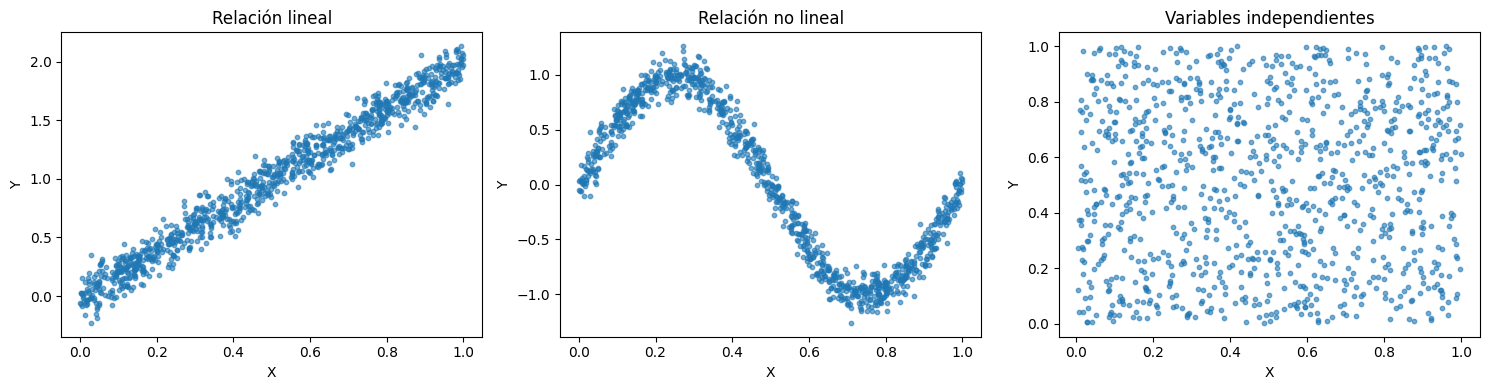

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mutualinfo.utils import generate_dependent_data, generate_independent_data

# Configurar semilla
SEED = 42
N = 1000

# Generar relaciones
x_lin, y_lin = generate_dependent_data(n_samples=N, relation="linear", noise=0.1, random_state=SEED)
x_nonlin, y_nonlin = generate_dependent_data(n_samples=N, relation="nonlinear", noise=0.1, random_state=SEED)
x_ind, y_ind = generate_independent_data(n=N, seed=SEED)

datasets = {
    "lineal": (x_lin, y_lin),
    "no lineal": (x_nonlin, y_nonlin),
    "independiente": (x_ind.reshape(-1, 1), y_ind)
}

# Visualizar
fig, axs = plt.subplots(1, 3, figsize=(15, 4))
axs[0].scatter(x_lin, y_lin, s=10, alpha=0.6)
axs[0].set_title("Relación lineal")
axs[1].scatter(x_nonlin, y_nonlin, s=10, alpha=0.6)
axs[1].set_title("Relación no lineal")
axs[2].scatter(x_ind, y_ind, s=10, alpha=0.6)
axs[2].set_title("Variables independientes")
for ax in axs:
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
plt.tight_layout()
plt.show()

In [10]:
from mutualinfo.estimators import (
    estimate_mi_histogram,
    estimate_mi_kde,
    estimate_mi_kraskov
)

# Número de bins para histogramas
bins = 20

# Estimar información mutua para cada tipo de relación
mi_results = {
    "lineal": {
        "Histogramas": estimate_mi_histogram(x_lin, y_lin, bins=bins),
        "KDE": estimate_mi_kde(x_lin, y_lin),
        "Kraskov": estimate_mi_kraskov(x_lin, y_lin.reshape(-1, 1))
    },
    "no lineal": {
        "Histogramas": estimate_mi_histogram(x_nonlin, y_nonlin, bins=bins),
        "KDE": estimate_mi_kde(x_nonlin, y_nonlin),
        "Kraskov": estimate_mi_kraskov(x_nonlin, y_nonlin.reshape(-1, 1))
    },
    "independiente": {
        "Histogramas": estimate_mi_histogram(x_ind.reshape(-1, 1), y_ind.reshape(-1, 1), bins=bins),
        "KDE": estimate_mi_kde(x_ind.reshape(-1, 1), y_ind.reshape(-1, 1)),
        "Kraskov": estimate_mi_kraskov(x_ind.reshape(-1, 1), y_ind.reshape(-1, 1))
    }
}

# Mostrar resultados
import pandas as pd
df_mi = pd.DataFrame(mi_results).T
df_mi = df_mi.round(4)
df_mi

,Histogramas,KDE,Kraskov
lineal,1.6243,1.7444,1.6493
no lineal,1.5608,0.7121,1.6647
independiente,0.2045,0.0179,-0.0245


In [11]:
from mutualinfo.uncertainty import bootstrap_ci

# Parámetros comunes
n_bootstraps = 100
alpha = 0.05  # para intervalo del 95%

# Estimación de IC por bootstrap para cada tipo de relación
bootstrap_results = {}

for name, (x, y) in {
    "lineal": (x_lin, y_lin),
    "no lineal": (x_nonlin, y_nonlin),
    "independiente": (x_ind.reshape(-1, 1), y_ind.reshape(-1, 1))
}.items():
    # Asegurarse de que y sea 2D
    if y.ndim == 1:
        y = y.reshape(-1, 1)

    lower, upper = bootstrap_ci(estimate_mi_kraskov, x, y, n_bootstraps=n_bootstraps, alpha=alpha)
    bootstrap_results[name] = {"IC 95% inferior": lower, "IC 95% superior": upper}

# Mostrar resultados
df_bootstrap = pd.DataFrame(bootstrap_results).T.round(4)
df_bootstrap

,IC 95% inferior,IC 95% superior
lineal,2.0305,2.2750
no lineal,2.0461,2.2553
independiente,0.5627,0.8340


In [12]:
from mutualinfo.uncertainty.kraskov_cp import estimate_mi_kraskov_conformal
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.utils.multiclass import type_of_target

results = {}

for name, (x, y) in datasets.items():
    # Detectar tipo de tarea
    target_type = type_of_target(y)
    if target_type in ["continuous", "continuous-multioutput"]:
        model = KNeighborsRegressor(n_neighbors=5)
        task = "regression"
    else:
        model = KNeighborsClassifier(n_neighbors=5)
        task = "classification"

    mi, h_y, h_y_given_x, coverage = estimate_mi_kraskov_conformal(
        x, y,
        model=model,
        task=task,
        alpha=0.05,
        n_bins=10,
        random_state=42
    )

    results[name] = {
        "MI": round(mi, 4),
        "H(Y)": round(h_y, 4),
        "H(Y|X)": round(h_y_given_x, 4),
        "Coverage": round(coverage, 4)
    }

import pandas as pd
df_results = pd.DataFrame(results).T
df_results

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_discretization.py:306: UserWarning: Bins whose width are too small (i.e., <= 1e-8) in feature 0 are removed. Consider decreasing the number of bins.
  warnings.warn(


,MI,H(Y),H(Y|X),Coverage
lineal,2.1730,2.8661,0.6931,0.2208
no lineal,2.2605,3.1360,0.8755,0.2571
independiente,0.6242,2.9660,2.3418,0.9285


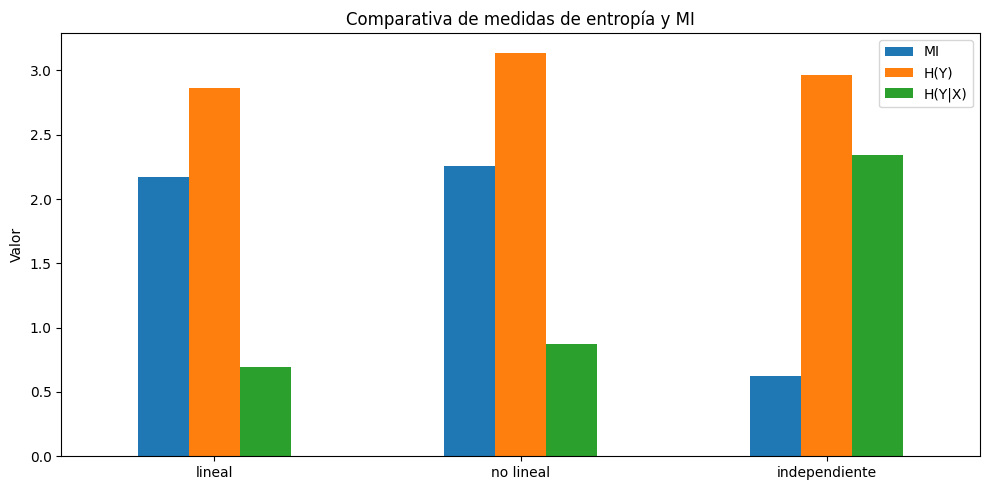

In [13]:
import matplotlib.pyplot as plt

df_results[["MI", "H(Y)", "H(Y|X)"]].plot(kind='bar', figsize=(10, 5))
plt.title("Comparativa de medidas de entropía y MI")
plt.ylabel("Valor")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## ✅ Fase 2 – Notebook `02_compare_estimators.ipynb`

### 🔍 1. Comparar estimadores clásicos en los 3 datasets:
- `estimate_mi_histogram`
- `estimate_mi_kde`
- `estimate_mi_kraskov`

### 📈 2. Comparar métodos de incertidumbre sobre Kraskov:
- `bootstrap_ci(estimate_mi_kraskov, X, y)`
- `conformal_ci(estimate_mi_kraskov, X, y)`
- `estimate_mi_kraskov_conformal(X, y, model=KNN, ...)`

### 🔁 3. Repetir cada experimento 10 veces con diferentes seeds:
- Calcular **media**, **desviación típica** y **cobertura** para cada método

### 📊 4. Visualizaciones adicionales:
- Boxplots de MI estimada
- Barras con error bars (± IC)
- Tabla resumen con comparación global

In [14]:
# Configuración global
SEEDS = list(range(10))
N = 1000
bins = 15

# Diccionario de generadores
generators = {
    "lineal": lambda seed: generate_dependent_data(n_samples=N, relation="linear", noise=0.1, random_state=seed),
    "no lineal": lambda seed: generate_dependent_data(n_samples=N, relation="nonlinear", noise=0.1, random_state=seed),
    "independiente": lambda seed: generate_independent_data(n=N, seed=seed)
}

In [15]:
from sklearn.preprocessing import KBinsDiscretizer
from tqdm import tqdm
import pandas as pd

results = []

for relation, generator in generators.items():
    for seed in tqdm(SEEDS, desc=f"Procesando {relation}"):
        x, y = generator(seed)

        # Asegurar formato 2D
        x = x.reshape(-1, 1) if x.ndim == 1 else x
        y = y.reshape(-1, 1) if y.ndim == 1 else y

        # Estimadores de MI
        mi_hist = estimate_mi_histogram(x, y, bins=bins)
        mi_kde = estimate_mi_kde(x, y)
        mi_ksg = estimate_mi_kraskov(x, y)

        # Intervalos Bootstrap
        ci_boot_inf, ci_boot_sup = bootstrap_ci(estimate_mi_kraskov, x, y, n_bootstraps=100, seed=seed)

        # Discretizar y para clasificación
        discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
        y_disc = discretizer.fit_transform(y).ravel().astype(int)

        # Conformal con radios: capturar solo H(Y|X)
        _, _, h_y_given_x_cp, _ = estimate_mi_cp_radius(x, y_disc)

        # Calcular MI como H(Y) - H(Y|X)
        h_y = np.log2(len(np.unique(y_disc)))  # H(Y) asumido como log2(n_clases)
        mi_cp = h_y - h_y_given_x_cp

        ci_conf_inf = mi_cp - 0.1  # Aquí puedes ajustar tu forma de calcularlo si sabes más del intervalo
        ci_conf_sup = mi_cp + 0.1

        # Registrar resultados
        results.append({
            "relación": relation,
            "semilla": seed,
            "MI_hist": mi_hist,
            "MI_kde": mi_kde,
            "MI_ksg": mi_ksg,
            "CI_boot_inf": ci_boot_inf,
            "CI_boot_sup": ci_boot_sup,
            "CI_conf_inf": ci_conf_inf,
            "CI_conf_sup": ci_conf_sup
        })

# Convertir a DataFrame
df_all = pd.DataFrame(results)
df_all.head()

Procesando independiente: 100%|██████████| 10/10 [12:54<00:00, 77.44s/it]


,relación,semilla,MI_hist,MI_kde,MI_ksg,CI_boot_inf,CI_boot_sup,CI_conf_inf,CI_conf_sup
0,lineal,0,1.510564,1.695476,1.597726,1.987774,2.221619,1.726078,1.926078
1,lineal,1,1.505890,1.697020,1.583163,1.978675,2.216451,1.726928,1.926928
2,lineal,2,1.552087,1.743360,1.678921,2.056892,2.274668,1.706928,1.906928
3,lineal,3,1.531276,1.733066,1.648891,2.026084,2.226547,2.011928,2.211928
4,lineal,4,1.564011,1.758070,1.658475,2.046881,2.285069,1.811928,2.011928


In [16]:
df_mean = df_all.groupby("relación").mean(numeric_only=True).round(3)
df_mean

,semilla,MI_hist,MI_kde,MI_ksg,CI_boot_inf,CI_boot_sup,CI_conf_inf,CI_conf_sup
relación,,,,,,,,
independiente,4.5,0.104,0.016,-0.017,0.552,0.856,-0.100,0.100
lineal,4.5,1.541,1.724,1.623,2.016,2.250,1.789,1.989
no lineal,4.5,1.425,0.733,1.653,2.044,2.272,1.974,2.174


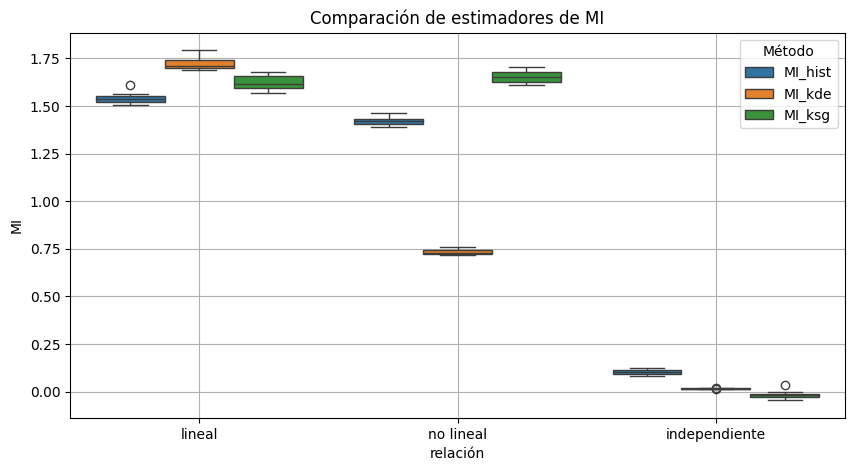

In [17]:
import seaborn as sns

df_plot = df_all.melt(id_vars=["relación", "semilla"],
                      value_vars=["MI_hist", "MI_kde", "MI_ksg"],
                      var_name="Método", value_name="MI")

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_plot, x="relación", y="MI", hue="Método")
plt.title("Comparación de estimadores de MI")
plt.grid(True)
plt.show()

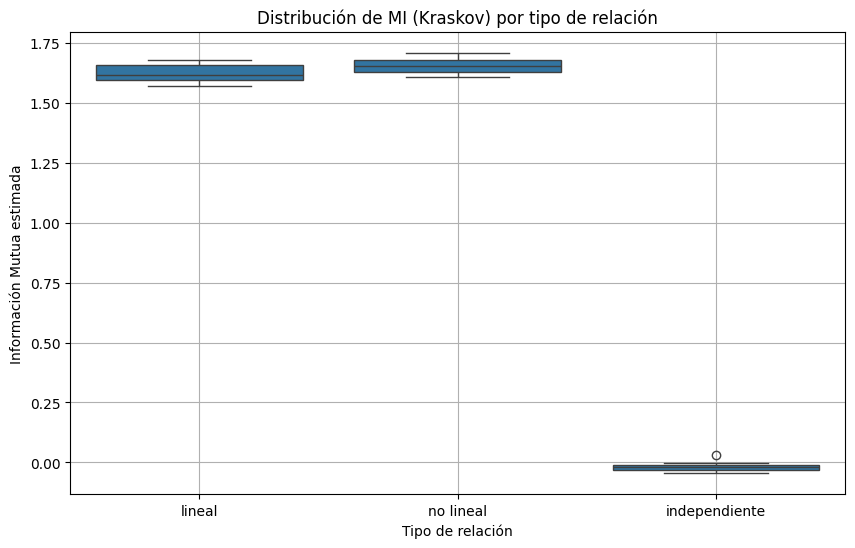

In [18]:
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(data=df_all, x="relación", y="MI_ksg")
plt.title("Distribución de MI (Kraskov) por tipo de relación")
plt.ylabel("Información Mutua estimada")
plt.xlabel("Tipo de relación")
plt.grid(True)
plt.show()

In [19]:
ranking = df_all.groupby("relación")[["MI_hist", "MI_kde", "MI_ksg"]].mean().rank(axis=1, ascending=False)
ranking

,MI_hist,MI_kde,MI_ksg
relación,,,
independiente,1.0,2.0,3.0
lineal,3.0,1.0,2.0
no lineal,2.0,3.0,1.0


In [20]:
summary = df_all.groupby("relación").agg({
    "MI_hist": ["mean", "std"],
    "MI_kde": ["mean", "std"],
    "MI_ksg": ["mean", "std"],
    "CI_boot_inf": "mean",
    "CI_boot_sup": "mean",
    "CI_conf_inf": "mean",
    "CI_conf_sup": "mean"
}).round(4)

summary.columns = ['_'.join(col) for col in summary.columns]
summary

,MI_hist_mean,MI_hist_std,MI_kde_mean,MI_kde_std,MI_ksg_mean,MI_ksg_std,CI_boot_inf_mean,CI_boot_sup_mean,CI_conf_inf_mean,CI_conf_sup_mean
relación,,,,,,,,,,
independiente,0.1044,0.0132,0.0162,0.0023,-0.0169,0.0210,0.5516,0.8560,-0.1000,0.1000
lineal,1.5408,0.0300,1.7240,0.0332,1.6234,0.0382,2.0161,2.2498,1.7892,1.9892
no lineal,1.4249,0.0252,0.7332,0.0163,1.6528,0.0339,2.0444,2.2722,1.9739,2.1739


🔍 Relación: lineal - 10 filas válidas


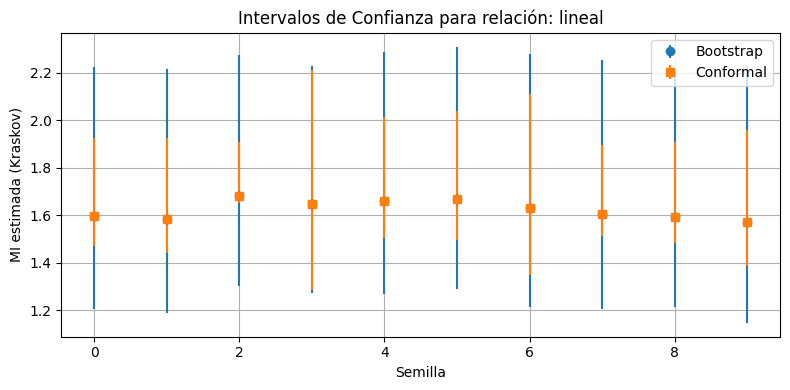

🔍 Relación: no lineal - 10 filas válidas


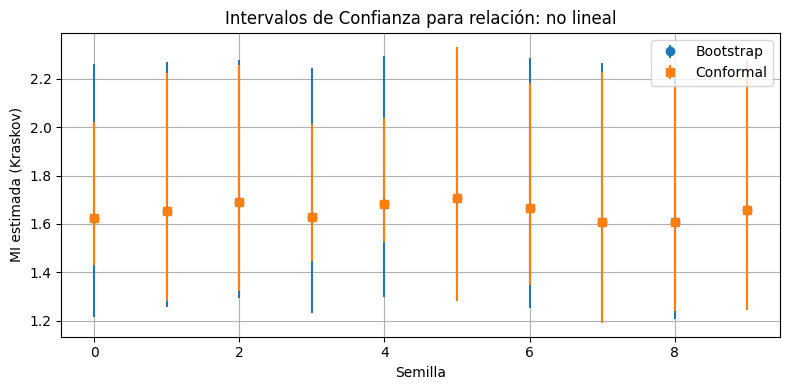

🔍 Relación: independiente - 10 filas válidas


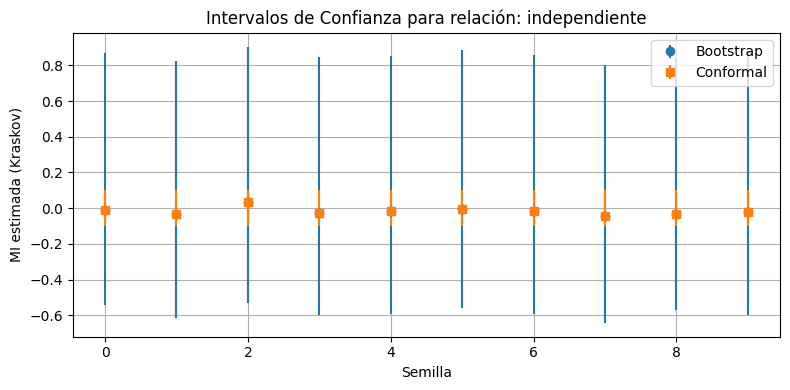

In [21]:
import numpy as np
import matplotlib.pyplot as plt

for relation in df_all["relación"].unique():
    subset = df_all[df_all["relación"] == relation].copy()

    # Forzar conversión segura a float, errores a NaN
    for col in ["CI_boot_inf", "CI_boot_sup", "CI_conf_inf", "CI_conf_sup"]:
        subset[col] = pd.to_numeric(subset[col], errors="coerce")

    # Eliminar filas con NaNs
    subset = subset.dropna(subset=["CI_boot_inf", "CI_boot_sup", "CI_conf_inf", "CI_conf_sup"])

    print(f"🔍 Relación: {relation} - {len(subset)} filas válidas")

    if len(subset) == 0:
        print("⚠️ No hay datos válidos, se omite esta relación.\n")
        continue

    # Calcular yerr
    yerr_boot = np.abs([
        subset["MI_ksg"] - subset["CI_boot_inf"],
        subset["CI_boot_sup"] - subset["MI_ksg"]
    ])

    yerr_conf = np.abs([
        subset["MI_ksg"] - subset["CI_conf_inf"],
        subset["CI_conf_sup"] - subset["MI_ksg"]
    ])

    # Graficar
    plt.figure(figsize=(8, 4))
    plt.errorbar(subset["semilla"], subset["MI_ksg"], yerr=yerr_boot, fmt='o', label="Bootstrap")
    plt.errorbar(subset["semilla"], subset["MI_ksg"], yerr=yerr_conf, fmt='s', label="Conformal")
    plt.title(f"Intervalos de Confianza para relación: {relation}")
    plt.xlabel("Semilla")
    plt.ylabel("MI estimada (Kraskov)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [22]:
print(">> Salida de estimate_mi_cp_radius:")
print(estimate_mi_cp_radius(x, y_disc))

>> Salida de estimate_mi_cp_radius:
(np.float64(-0.026246341261735306), np.float64(2.295681753625627), np.float64(2.321928094887362), np.float64(1.0))


In [30]:
! pip install memory_profiler

In [31]:
import numpy as np
import pandas as pd
import time
import psutil
from memory_profiler import memory_usage
from tqdm import tqdm
from sklearn.preprocessing import KBinsDiscretizer

# Tamaños a probar
N_list = [100, 500, 1000, 5000]
SEEDS = [0]  # Solo 1 semilla por tamaño para comparar
bins = 15

# Reemplaza estas funciones por las reales
# generate_dependent_data, generate_independent_data
# estimate_mi_histogram, estimate_mi_kde, estimate_mi_kraskov
# bootstrap_ci, estimate_mi_cp_radius

generators = {
    "lineal": lambda seed, N: generate_dependent_data(n_samples=N, relation="linear", noise=0.1, random_state=seed),
    "no lineal": lambda seed, N: generate_dependent_data(n_samples=N, relation="nonlinear", noise=0.1, random_state=seed),
    "independiente": lambda seed, N: generate_independent_data(n=N, seed=seed)
}

def profile_function(func, *args, **kwargs):
    cpu_before = psutil.cpu_percent(interval=None)
    mem_usage = memory_usage((func, args, kwargs), max_usage=True)
    start = time.perf_counter()
    result = func(*args, **kwargs)
    elapsed = time.perf_counter() - start
    cpu_after = psutil.cpu_percent(interval=None)
    return result, elapsed, mem_usage, (cpu_before + cpu_after) / 2

results = []

for N in N_list:
    for relation, generator in generators.items():
        for seed in SEEDS:
            x, y = generator(seed, N)
            x = x.reshape(-1, 1) if x.ndim == 1 else x
            y = y.reshape(-1, 1) if y.ndim == 1 else y

            # Histogram
            _, t_hist, mem_hist, cpu_hist = profile_function(estimate_mi_histogram, x, y, bins=bins)

            # KDE
            _, t_kde, mem_kde, cpu_kde = profile_function(estimate_mi_kde, x, y)

            # KSG
            _, t_ksg, mem_ksg, cpu_ksg = profile_function(estimate_mi_kraskov, x, y)

            # Bootstrap
            _, t_boot, mem_boot, cpu_boot = profile_function(bootstrap_ci, estimate_mi_kraskov, x, y, n_bootstraps=100, seed=seed)

            # Conformal
            discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')
            y_disc = discretizer.fit_transform(y).ravel().astype(int)
            _, _, h_y_given_x_cp, _ = profile_function(estimate_mi_cp_radius, x, y_disc)[0]
            h_y = np.log2(len(np.unique(y_disc)))
            mi_cp = h_y - h_y_given_x_cp

            results.append({
                "N": N,
                "relación": relation,
                "t_hist": t_hist,
                "mem_hist": mem_hist,
                "cpu_hist": cpu_hist,
                "t_kde": t_kde,
                "mem_kde": mem_kde,
                "cpu_kde": cpu_kde,
                "t_ksg": t_ksg,
                "mem_ksg": mem_ksg,
                "cpu_ksg": cpu_ksg,
                "t_boot": t_boot,
                "mem_boot": mem_boot,
                "cpu_boot": cpu_boot,
                "mi_cp": mi_cp
            })

df_profile_full = pd.DataFrame(results)

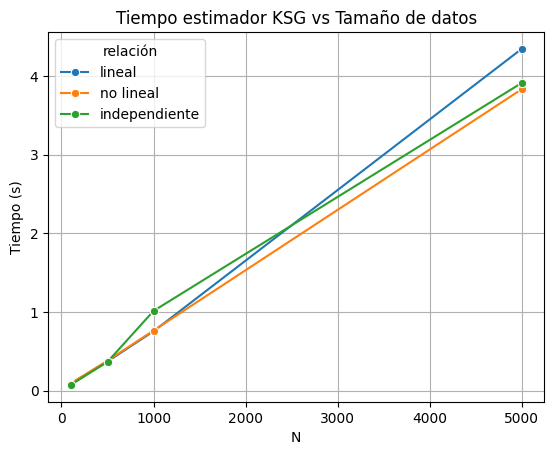

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.lineplot(data=df_profile_full, x="N", y="t_ksg", hue="relación", marker="o")
plt.title("Tiempo estimador KSG vs Tamaño de datos")
plt.ylabel("Tiempo (s)")
plt.grid(True)
plt.show()

In [33]:
df_profile_full.groupby("N")[["mem_hist", "mem_kde", "mem_ksg"]].mean()

,mem_hist,mem_kde,mem_ksg
N,,,
100,302.243490,302.343750,302.343750
500,302.444010,302.444010,302.450521
1000,302.457031,302.457031,302.457031
5000,302.654948,302.654948,302.654948
